# Resource Description Framework (RDF)

In this notebook, we will learn about the concepts associated with the Resource Descriptiion Framework (RDF). 

This notebook is structured as follows:
* [RDF Triple](#RDF_Triple)
* [Blank Nodes](#Blank_Nodes)
* [Literals](#Literals)
* [RDF Graphs](#RDF_Graphs)
* [Exercises](#Exercises3)

To handle RDF data, we are going to use the `rdflib` library https://rdflib.readthedocs.io.

Execute the following commands to install and import this library.

In [1]:
!pip install rdflib

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for rdflib from https://files.pythonhosted.org/packages/d4/b0/7b7d8b5b0d01f1a0b12cc2e5038a868ef3a15825731b8a0d776cf47566c0/rdflib-7.0.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/41.7 kB ? eta -:--:--
     --------- ------------------------------ 10.2/41.7 kB ? eta -:--:--
     -------------------------------------- 41.7/41.7 kB 669.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/531.9 kB ? eta -:--:--
   --------- ------------------------------ 122.9/531.9 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------  522.2/531.9 kB 6.6 MB/s eta 0:00:01
   ---------------------------------------  522.2/531.9 kB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 531.9/531.9 kB 3.7 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import rdflib

<a id='RDF_Triple'></a> 
## RDF Triple

RDF defines a graph-based data model, where the nodes of the graph represent entities/values and the edges represent the relationships among them. 

In RDF, the basic unit to represent entities and relationships is the **RDF triple**. Each triple is of the form `subject predicate object .`.   

For example, the following RDF triple (in [N-Triples](https://www.w3.org/TR/n-triples/)) states that *Marie Curie discovered Radium*:

$
<http://example.org/science#Marie_Curie> <http://example.org/science#discovered> <http://example.org/science#Radium> .
$

To create an RDF triple using `rdflib`, we first create each of the **RDF terms** used in the triple. The RDF terms are:
* **URIs**: used to globally identify resources. To create a URI in RDFLib we use `rdflib.URIRef`
* **Blank nodes**: refer to resources without identifiers and not globally addressable. To create a blank node in RDFLib we use `rdflib.BNode` 
* **Literals**: concrete data values (strings, integers, floats, dates, etc.). To create a literal in RDFLib we use `rdflib.Literal` 

For example, in the following we create the RDF terms for the given RDF triple about Marie Curie.  

In [3]:
mCurie = rdflib.URIRef('http://example.org/science#Marie_Curie')
discovered = rdflib.URIRef('http://example.org/science#discovered')
radium = rdflib.URIRef('http://example.org/science#Radium')

Now, we can create an RDF triple by creating a tuple structure in Python, using the previously defined subject (variable `mCurie`), predicate (variable `discovered`), and object (variable `radium`). 

In [4]:
triple = (mCurie, discovered, radium)
triple

(rdflib.term.URIRef('http://example.org/science#Marie_Curie'),
 rdflib.term.URIRef('http://example.org/science#discovered'),
 rdflib.term.URIRef('http://example.org/science#Radium'))

Formally, RDF triples can be defined as a 3-tuple $<s,p,o> \ \in \ (U \cup B) \times U \times (U \cup B \cup L)$, where $U$ is the set of URIs, $B$ the set of blank nodes, and $L$ the set of RDF literals. This means that:
* **Subjects** can be URIs or blank nodes
* **Predicates** can only be URIs 
* **Objects** can be URIs, blank nodes, or RDF literals

So far, we have learned how to create triples with URI terms. In the following sections, we will learn more about [blank nodes](#Blank_Nodes) and [literals](#Literals).

<a id='Blank_Nodes'></a> 
## Blank Nodes

Blank nodes (or bnodes) are RDF terms that refer to resources without a known identifier. Formally, blank nodes represent *existential variables*, i.e., they indicate that the resource exists but the concrete value is not given.  

For example, assume that we want to model the statement *Marie Curie discovered something*, but we do not know exactly what the discovery was. We can use a blank node in the object position of the triple to indicate that the value of the discovery is, in this example, unknown:

$ <http://example.org/science#Marie_Curie> <http://example.org/science#discovered> _:x . $

To represent blank nodes in the [N-Triples](https://www.w3.org/TR/n-triples/) serialization, we use the prefix `_:` before the label of the blank node.  

**Important.** If the same blank node label (for example, `_:x`) appears in different RDF graphs, they do not represent the same resource. This is what we mean when we say that blank nodes are not *globally addressable*.  

In RDFLib, we create a blank node using the function `rdflib.BNode`. 

In [5]:
discovery = rdflib.BNode()
discovery

rdflib.term.BNode('Nd9d632443b3f40548108fc713455159a')

Note that, in this example, RDFLib assigned an internal label or hash to the blank node. 

**Important.** RDFLib allows for specifying a label for the blank node. However, this functionality should only be used by query engines and not when we are creating the RDF terms and triples manually. 

Now we can use the blank node `discovery` in an RDF triple to model that *Marie Curie discovered something*. 

In [6]:
triple2 = (mCurie, discovered, discovery)
triple2

(rdflib.term.URIRef('http://example.org/science#Marie_Curie'),
 rdflib.term.URIRef('http://example.org/science#discovered'),
 rdflib.term.BNode('Nd9d632443b3f40548108fc713455159a'))

Note that we can reuse the same blank node in another RDF triple. For example, we can model that *Pierre Curie discovered something* and that something is the same resource discovered by Marie Curie, as follows:

$<http://example.org/science#Pierre_Curie> <http://example.org/science#discovered> _:x .$ 

In this case, we just need to create an URI term for Pierre Curie, and reuse the terms in the variables `discovered` and `discovery` that we previously created.  

In [9]:
pCurie = rdflib.URIRef('http://example.org/science#Pierre_Curie')
triple3 = (pCurie, discovered, discovery)
triple3

(rdflib.term.URIRef('http://example.org/science#Pierre_Curie'),
 rdflib.term.URIRef('http://example.org/science#discovered'),
 rdflib.term.BNode('Nd9d632443b3f40548108fc713455159a'))

<a id='Literals'></a> 
## Literals

Literals allow for specifying values (strings, numbers, dates, etc.) in RDF. 

For example, we use a literal to model the statement *Marie Curie's birthname is Maria Salomea Skłodowska*, as follows:

$<http://example.org/science#Marie_Curie> <http://example.org/science#birthname> "Maria Salomea Skłodowska" .$

In the [N-Triples](https://www.w3.org/TR/n-triples/) serialization, literals are enclosed in quotes. 

To create a literal in RDFLib, we use the function `rdflib.Literal`.  

In [10]:
name = rdflib.Literal("Maria Salomea Skłodowska")
name

rdflib.term.Literal('Maria Salomea Skłodowska')

In RDF, it is also possible to specify the datatype (integer, float, date, year, etc.) of a literal. 

In the [N-Triples](https://www.w3.org/TR/n-triples/) serialization, we specify the datatype preceded by '^^'. 
For example, the following RDF triple models the statement *Marie Curie's birthdate is "1867-11-07" (date)*: 

$<http://example.org/science#Marie_Curie> <http://example.org/science#birthDate> "1867-11-07"^^<http://www.w3.org/2001/XMLSchema#date> .$

The valid datatypes are defined in the [XML Schema 1.1 Part 2: Datatypes](http://www.w3.org/TR/xmlschema11-2/). In this notebook, we will use `xsd:boolean`, `xsd:date`, `xsd:integer`, `xsd:float`, and `xsd:gYear`. 

To create a datatyped literal in RDFLib, we use the function `rdflib.Literal`, and specify the corresponding datatype in the `datatype` input parameter.  In addition, we can use the `rdflib.XSD` namespace instead of writing the full URI of the datatype. 

In [11]:
date = rdflib.Literal("1867-11-07", datatype=rdflib.XSD.date)
date

rdflib.term.Literal('1867-11-07', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#date'))

<a id='RDF_Graphs'></a> 
## RDF Graphs

An RDF graph is a set of RDF triples. To create an RDF graph in RDFLib, we use the function `rdflib.Graph`. This function creates an empty graph.  

In [12]:
g = rdflib.Graph()
g

<Graph identifier=N9bde343092ed4054ac9cbba8f05905ac (<class 'rdflib.graph.Graph'>)>

We can add triples to the graph with the function `add` as follows:  

In [14]:
# Creation of RDF Terms
mCurie = rdflib.URIRef('http://example.org/science#Marie_Curie')
discovered = rdflib.URIRef('http://example.org/science#discovered')
radium = rdflib.URIRef('http://example.org/science#Radium')
# Creation of an RDF triple (optional)
triple = (mCurie, discovered, radium)
# Adding the triple to the graph
g.add(triple)
g

<Graph identifier=N9bde343092ed4054ac9cbba8f05905ac (<class 'rdflib.graph.Graph'>)>

We will now add more exemplary terms and triples to the graph.

In [15]:
birthname = rdflib.URIRef('http://example.org/science#birthname')
born = rdflib.URIRef('http://example.org/science#born')
hBecquerel = rdflib.URIRef('http://example.org/science#Henry_Becquerel')
dateBecquerel = rdflib.Literal("1852-12-15", datatype=rdflib.XSD.date)
received = rdflib.URIRef('http://example.org/science#received')
nobelPrize = rdflib.URIRef('http://example.org/science#nobelPrize')

g.add((mCurie, birthname, name))
g.add((mCurie, born, date))
g.add((mCurie, received, nobelPrize))
g.add((pCurie, received, nobelPrize))
g.add((hBecquerel, born, dateBecquerel))
g.add((hBecquerel, received, nobelPrize))

<Graph identifier=N9bde343092ed4054ac9cbba8f05905ac (<class 'rdflib.graph.Graph'>)>

To visualize our graph, run the cell below.

In [18]:
!pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/278.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/278.7 kB 660.6 kB/s eta 0:00:01
     ------------------------------ ------- 225.3/278.7 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 278.7/278.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=709573d160bfa76e5f6ea1b239f2b1a7c5a95a2ed4f9c33f5f76beac3ae68c31
  Stored in directory: c:\users\thano\appdata\local\pip\cache\wheels\bd\ce\e8\ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus


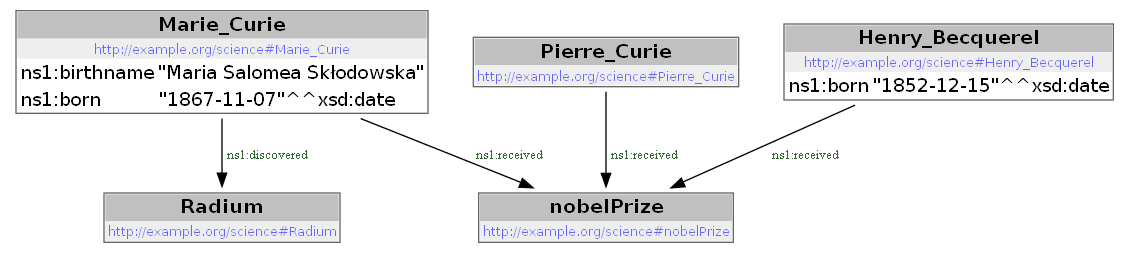

In [19]:
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

visualize(g)

<a id='Sparql3'></a>
## SPARQL

SPARQL (a recursive acronym for SPARQL Protocol and RDF Query Language) is a semantic query language for graph databases,<br>
meaning, it can be used to retrieve and manipulate RDF data.

There are four types of SPARQL queries, but for the purpose of this exercise we will focus on the most important one - SELECT queries. <br>With it we can select all or some of the matches from the graph we have built above.


In [20]:
# This query returns all triples in the graph
q1 = """
    PREFIX ex: <http://example.org/science#>
    SELECT ?s ?p ?o
    WHERE {
           ?s ?p ?o .
    }
"""

# Apply the query to our graph and iterate through results
for result in g.query(q1):
    print(result)

(rdflib.term.URIRef('http://example.org/science#Marie_Curie'), rdflib.term.URIRef('http://example.org/science#discovered'), rdflib.term.URIRef('http://example.org/science#Radium'))
(rdflib.term.URIRef('http://example.org/science#Pierre_Curie'), rdflib.term.URIRef('http://example.org/science#received'), rdflib.term.URIRef('http://example.org/science#nobelPrize'))
(rdflib.term.URIRef('http://example.org/science#Marie_Curie'), rdflib.term.URIRef('http://example.org/science#born'), rdflib.term.Literal('1867-11-07', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#date')))
(rdflib.term.URIRef('http://example.org/science#Henry_Becquerel'), rdflib.term.URIRef('http://example.org/science#received'), rdflib.term.URIRef('http://example.org/science#nobelPrize'))
(rdflib.term.URIRef('http://example.org/science#Henry_Becquerel'), rdflib.term.URIRef('http://example.org/science#born'), rdflib.term.Literal('1852-12-15', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#date'))

In [21]:
# This query returns the birthdate of all instances
q2 = """
    PREFIX ex: <http://example.org/science#>
    SELECT ?date
    WHERE {
           ?p ex:born ?date .
    }
"""

# Apply the query to our graph and iterate through results
for result in g.query(q2):
    print(result)

(rdflib.term.Literal('1867-11-07', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#date')),)
(rdflib.term.Literal('1852-12-15', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#date')),)


<a id='Exercises3'></a>
## Exercises

**Exercise 1.** Create an empty RDF graph using RDFLib. 

In [22]:
g1 = rdflib.Graph()

**Exercise 2.** Create RDF triples in RDFLib for the following triples in N-triples serialization.

* $<http://example.org/science#Alan_Turing> <http://example.org/science#field> <http://example.org/science#ComputerScience> .$
* $<http://example.org/science#Alan_Turing> <http://example.org/science#field> <http://example.org/science#Logic> .$
* $<http://example.org/science#Alan_Turing> <http://example.org/science#bornYear> "1938"^^<http://www.w3.org/2001/XMLSchema#gYear> .$
* $<http://example.org/science#Alan_Turing> <http://example.org/science#thesisTitle> "Systems of Logic Based on Ordinals" .$

Add the triples to the graph created in Exercise 1 and visualize it.

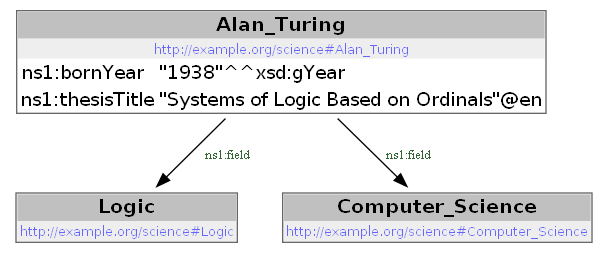

In [26]:
alan_turing = rdflib.URIRef('http://example.org/science#Alan_Turing')
computer_science = rdflib.URIRef('http://example.org/science#Computer_Science')
logic = rdflib.URIRef('http://example.org/science#Logic')
field = rdflib.URIRef('http://example.org/science#field')
bornYear = rdflib.URIRef('http://example.org/science#bornYear')
thesisTitle = rdflib.URIRef('http://example.org/science#thesisTitle')

g1.add((alan_turing, field, computer_science))
g1.add((alan_turing, field, logic))
g1.add((alan_turing, bornYear, rdflib.Literal("1938", datatype=rdflib.XSD.gYear)))
g1.add((alan_turing, thesisTitle, rdflib.Literal("Systems of Logic Based on Ordinals", lang="en")))

visualize(g1)

**Exercise 3.** Write a SPARQL SELECT query and print the title of Alan Turing's thesis from the graph created above.

In [28]:

q3 = """
    PREFIX ex: <http://example.org/science#>
    SELECT ?title
    WHERE {
           ex:Alan_Turing ex:thesisTitle ?title .
    }
"""

def query_rdf(q):
    """
    Executes an RDF SPARQL query and prints the results.

    Args:
        q (str): The SPARQL query string.

    Returns:
        Query results.
    """
    for result in g.query(q):
        print(result)

query_rdf(q3)


(rdflib.term.Literal('Systems of Logic Based on Ordinals', lang='en'),)


**Exercise 4.** Now go to the [Wikidata SPARQL engine](https://query.wikidata.org/) and write a SPARQL SELECT query that shall retrieve the name in the native language of all persons, who were born in Karlsruhe and were a member of the German National Football Team. Of course, you can try out your own query ideas for the Wikidata graph as well.

Hint: In Wikidata, the property *P1559* stands for 'name in the native language', *P19* for 'place of birth', *P54* for 'member of sports team', and entity *Q1040* stands for 'Karlsruhe' and *Q43310* for the 'German National Football Team'. Use the prefixes wd: for Wikidata entities and wdt: for Wikidata properties.PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>



In [48]:

# https://rdflib.github.io/sparqlwrapper/

import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """
SELECT ?name
    WHERE {
    ?item wdt:P19 wd:Q1040.
    ?item wdt:P54 wd:Q43310.
    ?item wdt:P1559 ?name.
    }
"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    print(result['name']['value'])


Oliver Kahn
Oliver Bierhoff
Mehmet Scholl
Dennis Aogo
